<div style=" background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Data Science
</h2>
</div>

# Installation des bibliothèques

In [31]:
!pip install nltk

### Import des bibliothèques

In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

### - Chargement du dataframe

In [2]:
df_tweets = pd.read_csv("tweets.csv")

In [3]:
### Affichage des 05 premières lignes
df_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
### Affichage des 05 dernières lignes
df_tweets.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
### Affichage des statistiques descriptives
df_tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
### Affichage des types
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### - Affichage des Nan

In [7]:
df_tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### - Identification des outliers

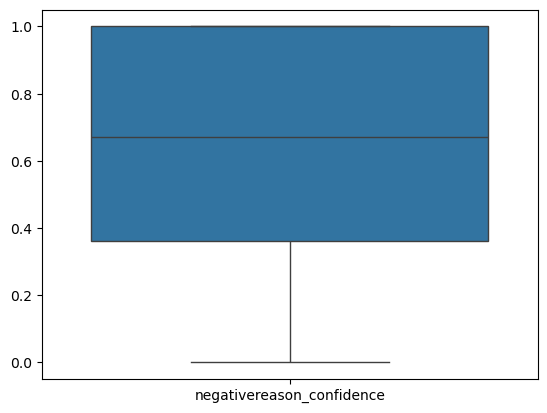

In [8]:
sns.boxplot(data = df_tweets[['negativereason', 'negativereason_confidence', 'airline_sentiment_gold','negativereason_gold', 'tweet_coord','tweet_location', 'user_timezone' ]]) 
plt.show()

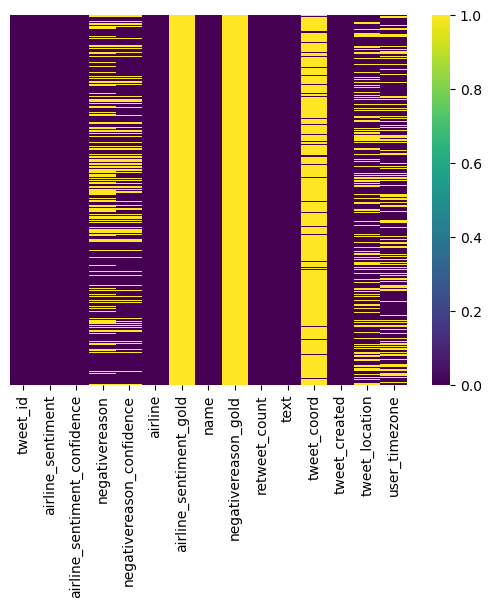

In [9]:
sns.heatmap(df_tweets.isnull(), yticklabels = False, cmap= 'viridis')
plt.show()

### - Imputation des NaN

- les variables numériques

In [10]:
df_tweets["airline_sentiment_confidence"] = df_tweets["airline_sentiment_confidence"].fillna(df_tweets["airline_sentiment_confidence"].median())

df_tweets["negativereason_confidence"] = df_tweets["negativereason_confidence"].fillna(df_tweets["negativereason_confidence"].median())

- les variables catégorielles

In [11]:
df_tweets = df_tweets.fillna("autres")

### - Vérification après imputation 

In [12]:
df_tweets.isnull().sum()

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64

### - Nettoyage

In [13]:
df_tweets.drop_duplicates(subset=["tweet_id"], inplace=True)
df_tweets["tweet_created"] = pd.to_datetime(df_tweets["tweet_created"], errors="coerce")

### - Ciblage

In [14]:
df_tweets["sentiment"] = df_tweets["airline_sentiment"].map({"negative":0, "neutral":1, "positive":2})

### - Prétraitement textuel

In [15]:
def clean_tweet(text):
    text = re.sub(r"http\S+|@\w+|#\w+", "", str(text))  # remove urls, mentions, hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower()

df_tweets["CleanText"] = df_tweets["text"].apply(clean_tweet)

### variables supplémentaires

In [16]:
df_tweets["nb_mentions"] = df_tweets["text"].str.count("@")
df_tweets["nb_hashtags"] = df_tweets["text"].str.count("#")
df_tweets["is_retweet"] = df_tweets["retweet_count"].apply(lambda x: 1 if x > 0 else 0)

### - Vectorisation

In [18]:
import joblib
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_tweets["CleanText"])
y = df_tweets["sentiment"]

# Enregistrer le vectorizer
joblib.dump(tfidf, "tweets_vectorizer.sav")
print("Vectorizer Tweets sauvegardé avec succès !")

Vectorizer Tweets sauvegardé avec succès !


### - Séparation des données en entrainement et test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Vérification de la séparation
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11588, 5000)
(2897, 5000)
(11588,)
(2897,)


### - Normalisation

In [21]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

### - Entraînement du modèle

In [22]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

### - Prédiction du modèle

In [23]:
y_pred = model_lr.predict(X_test)

### - Accuracy

In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.7973765964791163


### Metrics d'évaluation d'un modèle de classification

### - classification report

In [25]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1870
           1       0.65      0.55      0.59       605
           2       0.83      0.58      0.68       422

    accuracy                           0.80      2897
   macro avg       0.77      0.68      0.72      2897
weighted avg       0.79      0.80      0.79      2897



### - Confusion Matrix

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[1736  111   23]
 [ 248  330   27]
 [ 109   69  244]]


In [28]:
import joblib 
reviews_model='model_tweets.sav'
joblib.dump(model_lr, reviews_model)

['model_tweets.sav']

In [29]:
# Enregistrement du scaler ajusté
scaler_filename='scaler_tweets.sav'
joblib.dump(sc, scaler_filename)
print('Modèle et Scaler enregistrés avec succés')

Modèle et Scaler enregistrés avec succés
